<a href="https://colab.research.google.com/github/NasTiaFox30/ColabProjects/blob/master/Check_In_Day_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🏨 Check-In Day Predictor

Klasyfikacja dnia tygodnia przyjazdu gościa hotelowego

---





## 🎯 Cel zadania
Na podstawie danych gościa (płeć, miejscowość pochodzenia oraz cena za dobę) zbuduj model klasyfikacyjny, który przewidzi **dzień tygodnia**, w którym gość przyjechał do hotelu.

---

## 📂 Dane wejściowe
Plik `hotel_klasyfikacja.csv`, zawierający informacje o rezerwacjach hotelowych.

Najważniejsze kolumny:
- `plec` – płeć gościa (`M` lub `K`),
- `miejscowosc` – miejscowość pochodzenia gościa,
- `cena_za_dobe` – cena zapłacona za dobę,
- `dzien_tygodnia` – dzień tygodnia, w którym gość przyjechał.

---

## 🔧 Zakres prac

1. **Wczytaj dane i zapoznaj się z ich strukturą.**
2. **Wybierz cechy wejściowe:** `plec`, `miejscowosc`, `cena_za_dobe`.
3. **Zakoduj dane kategoryczne** (`plec`, `miejscowosc`, `dzien_tygodnia`) przy pomocy `LabelEncoder`.
4. **Podziel dane** na zbiory: treningowy i testowy (`train_test_split`).
5. **Zbuduj i przetestuj trzy modele klasyfikacyjne:**
   - `RandomForestClassifier`
   - `LogisticRegression`
   - `KNeighborsClassifier`
6. **Oceń skuteczność modeli:**
   - metryka dokładności (`accuracy_score`)
   - raport klasyfikacji (`classification_report`)
7. **Dla modelu Random Forest wypisz ważność cech** (`feature_importances_`).
8. **Przetestuj działanie modelu na nowym przypadku:**

   > Przykład: kobieta z Krakowa, cena za dobę 320 zł → przewidź dzień tygodnia.

---

## 💡 Wskazówki techniczne

- Do kodowania zmiennych tekstowych użyj `LabelEncoder`.
- Pamiętaj, aby przy przewidywaniu nowych przypadków używać tych samych encoderów co wcześniej.
- Wybierz model o najwyższej skuteczności do prognozowania nowych danych.




**Rozwiązanie zadania**

In [231]:
# 1. Import bibliotek
# Importujemy niezbędne biblioteki do wczytywania danych, przygotowania modelu i oceny wyników
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [232]:
# 2. Wczytanie danych
# Wczytujemy dane z pliku CSV zawierające informacje o rezerwacjach hotelowych
# https://drive.google.com/file/d/1oMPla7v9OG-RNCPdeQWkown9dQTeeFRA

gdown.download('https://drive.google.com/uc?id=1oMPla7v9OG-RNCPdeQWkown9dQTeeFRA', 'hotel_klasyfikacja.csv')

dane = pd.read_csv('hotel_klasyfikacja.csv')

Downloading...
From: https://drive.google.com/uc?id=1oMPla7v9OG-RNCPdeQWkown9dQTeeFRA
To: /content/hotel_klasyfikacja.csv
100%|██████████| 79.7k/79.7k [00:00<00:00, 56.7MB/s]


In [233]:
# 3. Podstawowa eksploracja danych
# Sprawdzamy informacje o kolumnach oraz pierwsze rekordy, aby zapoznać się z danymi

print(dane.info())
print(dane.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imie            1030 non-null   object 
 1   nazwisko        1030 non-null   object 
 2   miejscowosc     1030 non-null   object 
 3   plec            1030 non-null   object 
 4   nr_pokoju       1030 non-null   int64  
 5   data_przyjazdu  1030 non-null   object 
 6   dzien_tygodnia  1030 non-null   object 
 7   standard        1030 non-null   object 
 8   cena_za_dobe    1030 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 72.6+ KB
None
      imie    nazwisko miejscowosc plec  nr_pokoju data_przyjazdu  \
0    Pawel  Markiewicz      Lowicz    M        101     2022-07-04   
1   Marcin       Borek      Rybnik    M        101     2022-07-07   
2   Joanna       Benko     Wroclaw    K        101     2022-07-11   
3     Adam   Pohorecki       Opole    M        101     

In [234]:
# 4. Przygotowanie danych (wybór cech i etykiety)
# Wybieramy zmienne niezależne (cechy) i zmienną zależną (etykietę)
X = dane[["plec", "miejscowosc", "cena_za_dobe"]]
y = dane["dzien_tygodnia"]

In [235]:
# Kodowanie zmiennych kategorycznych
# Zamieniamy dane tekstowe na wartości liczbowe
le_plec = LabelEncoder()
le_miejscowosc = LabelEncoder()
le_dzien = LabelEncoder()

X['plec'] = le_plec.fit_transform(X['plec'])
X['miejscowosc'] = le_miejscowosc.fit_transform(X['miejscowosc'])
y = le_dzien.fit_transform(y)

<ipython-input-235-325675a767f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['plec'] = le_plec.fit_transform(X['plec'])
<ipython-input-235-325675a767f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['miejscowosc'] = le_miejscowosc.fit_transform(X['miejscowosc'])


In [236]:
# 5. Podział na zbiory treningowy i testowy
# Dzielimy dane na część do trenowania modelu i część testową
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
# 6. Klasyfikatory
# Tworzymy modele, które będziemy testować
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier(random_state=42)

In [238]:
# 7. Trenowanie i ocena
# Dla każdego modelu trenujemy go na danych treningowych, przewidujemy wyniki i oceniamy skuteczność

# Trenowanie:
model_lr.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Logistic Regression
print("Logistic Regression:")
y_pred_lr = model_lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le_dzien.classes_))

# nKNeighborsClassifier
print("\nKNeighborsClassifier:")
y_pred_knn = model_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=le_dzien.classes_))

# Random Forest
print("\nRandom Forest:")
y_pred_rf = model_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le_dzien.classes_))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.1796116504854369
              precision    recall  f1-score   support

    czwartek       0.00      0.00      0.00        12
   niedziela       0.19      0.31      0.24        45
      piątek       0.16      0.56      0.25        36
poniedziałek       0.00      0.00      0.00        39
      sobota       0.38      0.08      0.13        38
      wtorek       0.00      0.00      0.00        22
       środa       0.00      0.00      0.00        14

    accuracy                           0.18       206
   macro avg       0.10      0.14      0.09       206
weighted avg       0.14      0.18      0.12       206


KNeighborsClassifier:
Accuracy: 0.16990291262135923
              precision    recall  f1-score   support

    czwartek       0.00      0.00      0.00        12
   niedziela       0.21      0.38      0.27        45
      piątek       0.21      0.19      0.20        36
poniedziałek       0.18      0.08      0.11        39
      sobota       0.19      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [239]:
# 8. Ważność cech - tylko dla Random Forest
# Sprawdzamy, które cechy miały największy wpływ na decyzje klasyfikatora Random Forest
importances = model_rf.feature_importances_

# Wyświetlenie ważności w tekscie
for cecha, waga in zip(X.columns, importances):
    print(f"Cecha: {cecha:15} | Ważność: {waga:.3f}")

Cecha: plec            | Ważność: 0.018
Cecha: miejscowosc     | Ważność: 0.829
Cecha: cena_za_dobe    | Ważność: 0.152


In [240]:
# 9. Przykład klasyfikacji nowego przypadku
# Tworzymy przykładowe dane: kobieta z Warszawy, cena za dobę 320 zł
nowe_dane = pd.DataFrame({
    "plec": ["K"],
    "miejscowosc": ["Krakow"],
    "cena_za_dobe": [320.0]
})

# # Dodatkowe testowanie:
# Tworzymy przykładowe dane: kobieta z Lublin, cena z adobę 500 zł
# nowe_dane = pd.DataFrame({
#     "plec": ["K"],
#     "miejscowosc": ["Lublin"],
#     "cena_za_dobe": [500.0]
# })

# Tworzymy przykładowe dane: mieżczyzna z Poznan, cena z adobę 350 zł
# nowe_dane = pd.DataFrame({
#     "plec": ["M"],
#     "miejscowosc": ["Poznan"],
#     "cena_za_dobe": [370.0]
# })


In [241]:
# 10. Przewidujemy dzień tygodnia modelem RandomForest

nowe_dane['plec'] = le_plec.transform(nowe_dane['plec'])
nowe_dane['miejscowosc'] = le_miejscowosc.transform(nowe_dane['miejscowosc'])

predykcja = model_rf.predict(nowe_dane)
dzien_tygodnia = le_dzien.inverse_transform(predykcja)[0]
print(f"\nPrzewidziany dzień tygodnia: {dzien_tygodnia}")


Przewidziany dzień tygodnia: środa


## 🎓 Rozszerzenie

- Przetestuj więcej przypadków i sprawdź, jak zmiana miejscowości lub ceny wpływa na wynik.
- Dodaj dodatkowe cechy, np. `standard` lub `nr_pokoju`, i sprawdź, czy poprawiają skuteczność.
- Zrób wykresy rozkładu dni tygodnia względem płci lub miasta (`seaborn`, `matplotlib`).

In [242]:
# Import bibliotek
# Importujemy niezbędne biblioteki do wczytywania danych, przygotowania modelu i oceny wyników
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [243]:
# Wczytanie danych
# Wczytujemy dane z pliku CSV zawierające informacje o rezerwacjach hotelowych
# https://drive.google.com/file/d/1oMPla7v9OG-RNCPdeQWkown9dQTeeFRA

gdown.download('https://drive.google.com/uc?id=1oMPla7v9OG-RNCPdeQWkown9dQTeeFRA', 'hotel_klasyfikacja.csv')

dane = pd.read_csv('hotel_klasyfikacja.csv')

Downloading...
From: https://drive.google.com/uc?id=1oMPla7v9OG-RNCPdeQWkown9dQTeeFRA
To: /content/hotel_klasyfikacja.csv
100%|██████████| 79.7k/79.7k [00:00<00:00, 60.3MB/s]


In [244]:
# Przygotowanie danych (wybór cech i etykiety)
# Wybieramy zmienne niezależne (cechy) i zmienną zależną (etykietę)

# Rozszerzenie:
X = dane[["plec", "miejscowosc", "cena_za_dobe", "nr_pokoju"]]
y = dane["dzien_tygodnia"]

In [245]:
# Kodowanie zmiennych kategorycznych
# Zamieniamy dane tekstowe na wartości liczbowe
le_plec = LabelEncoder()
le_miejscowosc = LabelEncoder()
le_dzien = LabelEncoder()

X['plec'] = le_plec.fit_transform(X['plec'])
X['miejscowosc'] = le_miejscowosc.fit_transform(X['miejscowosc'])
y = le_dzien.fit_transform(y)

<ipython-input-245-325675a767f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['plec'] = le_plec.fit_transform(X['plec'])
<ipython-input-245-325675a767f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['miejscowosc'] = le_miejscowosc.fit_transform(X['miejscowosc'])


In [246]:
# Podział na zbiory treningowy i testowy
# Dzielimy dane na część do trenowania modelu i część testową
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
# Klasyfikatory
# Tworzymy model
model_rf = RandomForestClassifier(random_state=42)

In [248]:
# 7. Trenowanie i ocena
# trenujemy model na danych treningowych, przewidujemy wyniki i oceniamy skuteczność

# Trenowanie:
model_rf.fit(X_train, y_train)

# Random Forest
print("\nRandom Forest:")
y_pred_rf = model_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le_dzien.classes_))


Random Forest:
Accuracy: 0.18446601941747573
              precision    recall  f1-score   support

    czwartek       0.07      0.08      0.08        12
   niedziela       0.19      0.24      0.22        45
      piątek       0.21      0.28      0.24        36
poniedziałek       0.29      0.10      0.15        39
      sobota       0.19      0.24      0.21        38
      wtorek       0.21      0.14      0.17        22
       środa       0.00      0.00      0.00        14

    accuracy                           0.18       206
   macro avg       0.17      0.15      0.15       206
weighted avg       0.20      0.18      0.18       206



In [249]:
# Ocena skuteczności
# Random Forest
print("Random Forest:")
# y_pred_rf = model_rf.predict(X_test)
accuracy_with_room = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy z nr_pokoju: {accuracy_with_room:.3f}")


# Porównanie z modelem bez nr_pokoju
X_without_room = X.drop(columns=['nr_pokoju'])

X_train_no_room, X_test_no_room, y_train_no_room, y_test_no_room = train_test_split(X_without_room, y, test_size=0.2, random_state=42)

model_rf_no_room = RandomForestClassifier(random_state=42)
model_rf_no_room.fit(X_train_no_room, y_train_no_room)

y_pred_no_room = model_rf_no_room.predict(X_test_no_room)
accuracy_no_room = accuracy_score(y_test_no_room, y_pred_no_room)
print(f"Accuracy bez nr_pokoju: {accuracy_no_room:.3f}")


Random Forest:
Accuracy z nr_pokoju: 0.184
Accuracy bez nr_pokoju: 0.180


In [250]:
# Implementacja wykresów
import seaborn as sns
import matplotlib.pyplot as plt

dane['dzien_tygodnia'] = le_dzien.inverse_transform(y)
dane['plec'] = le_plec.inverse_transform(X['plec'])

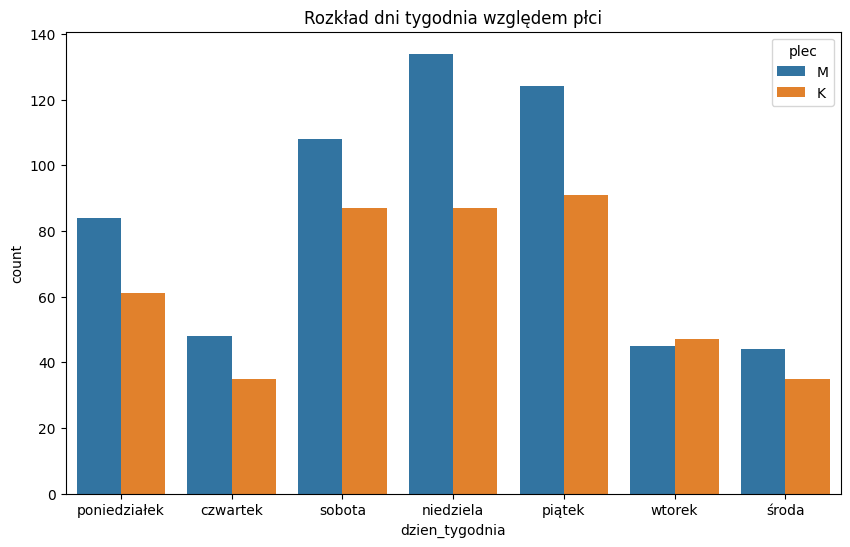

In [251]:
# Wykres 1: Płeć a dzień tygodnia
plt.figure(figsize=(10, 6))
sns.countplot(data=dane, x='dzien_tygodnia', hue='plec')
plt.title("Rozkład dni tygodnia względem płci")
plt.show()

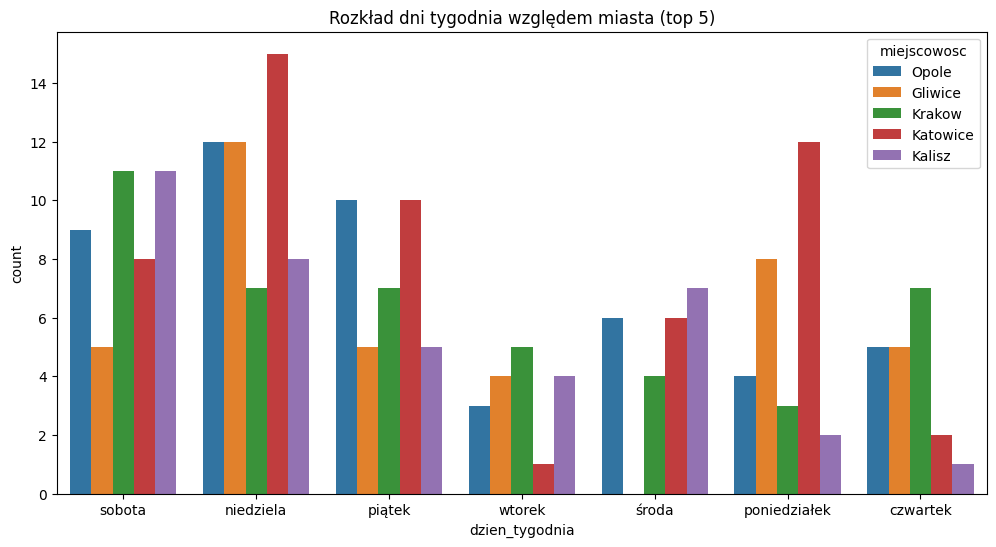

In [252]:
# Wykres 2: Miasto a dzień tygodnia (top 5)
top_miasta = dane['miejscowosc'].value_counts().nlargest(5).index
dane_top_miasta = dane[dane['miejscowosc'].isin(top_miasta)]
plt.figure(figsize=(12, 6))
sns.countplot(data=dane_top_miasta, x='dzien_tygodnia', hue='miejscowosc')
plt.title("Rozkład dni tygodnia względem miasta (top 5)")
plt.show()

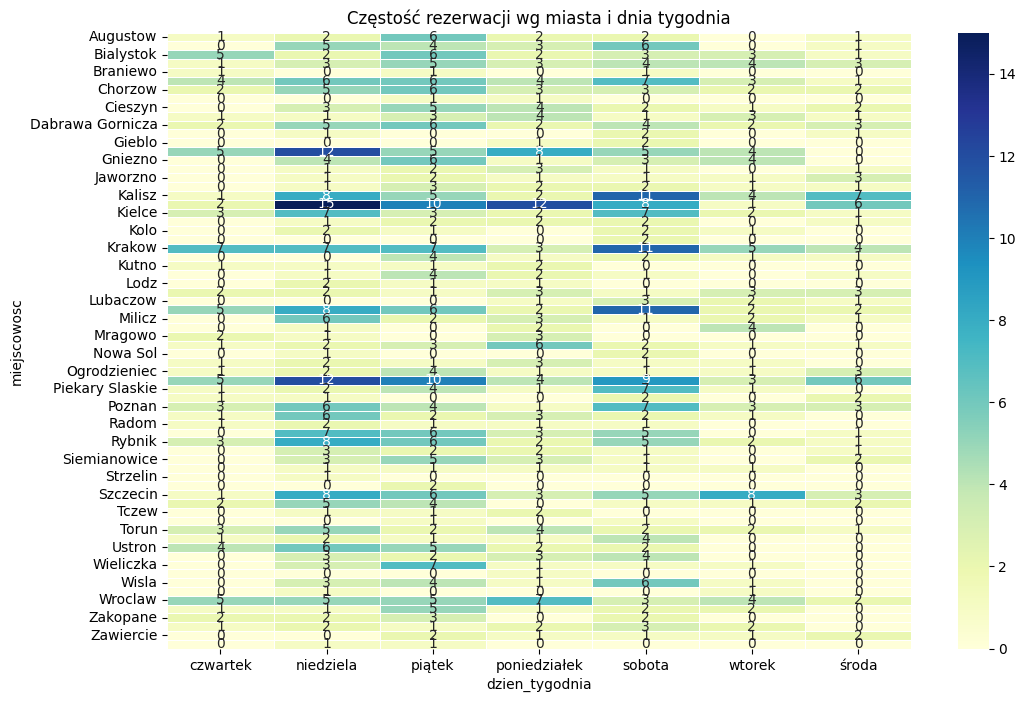

In [253]:
# Wykres 3: Heatmapa
cross_tab = pd.crosstab(dane['miejscowosc'], dane['dzien_tygodnia'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title("Częstość rezerwacji wg miasta i dnia tygodnia")
plt.show()